# Caribbean Region Weather Forecasting

## Correlaions and Relationships

In this section of EDA, we find out whether there are correlations between temperature anomaly and precipitation in the Caribbean Region. We explore pairwise scatter plots to identify associations, and consider seasonality and skewness effects in time series. 

Previous notebooks in the same series of forecasting Caribbean Climate:

[01-download-and-data-wrangling.ipynb](01-download-and-data-wrangling.ipynb)

[02-descriptive-stats.ipynb](02-descriptive-stats.ipynb)

[03-EDA-temperature-anomaly.ipynb](03-EDA-temperature-anomaly.ipynb)

[04-EDA-precipitation.ipynb](04-EDA-precipitation.ipynb)

**Author:** Nazgul Sagatova  
**Last updated:** 2025-12-4

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset

from utils import load_caribbean_weather

df = load_caribbean_weather()

In [4]:
# Pairwise Pearson Correlation (global and groupd by year)

# Global
corr = df[['temp_anomaly', 'precip']].corr().iloc[0,1]
print(f"Global Pearson r = {corr:.3f}")

# By Year (detect decadal shifts)
corr_by_year = (
    df.groupby('year')[['temp_anomaly', 'precip']]
      .corr().iloc[0::2, -1]          # every odd row = cross-var corr
      .reset_index(level=1, drop=True)
      .rename('r')
)
print(corr_by_year.describe())

Global Pearson r = 0.020
count    46.000000
mean      0.095097
std       0.725809
min      -0.979243
25%      -0.591421
50%       0.257751
75%       0.818136
max       0.986625
Name: r, dtype: float64


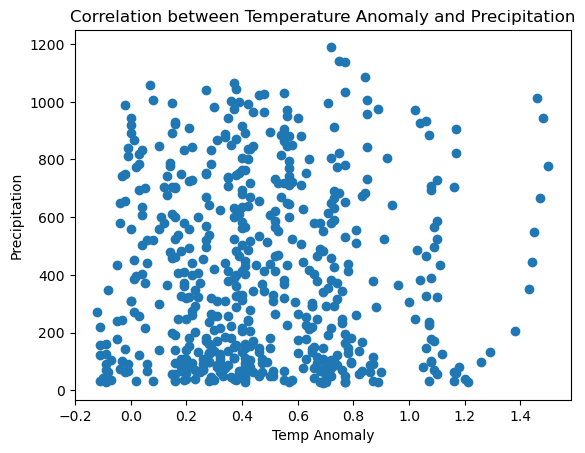

In [8]:
#Scatter plot the relationship

plt.scatter(x = 'temp_anomaly', y = 'precip', data=df)
plt.title('Correlation between Temperature Anomaly and Precipitation')
plt.xlabel('Temp Anomaly')
plt.ylabel('Precipitation')
plt.show()

In [9]:
from scipy.stats import spearmanr
rho, p = spearmanr(df['temp_anomaly'], df['precip'], nan_policy='omit')
print(f"Spearman ρ = {rho:.3f}, p = {p:.1e}")

Spearman ρ = 0.005, p = 9.1e-01


## Data Transformations

Earlier we observed skewness in precipitation distribution, and high value magnitudes. We will us Q-Q plots to compare temp anomaly and precipitation distributions to see similaritis and differences in shape, and scale.

### Q-Q Plot

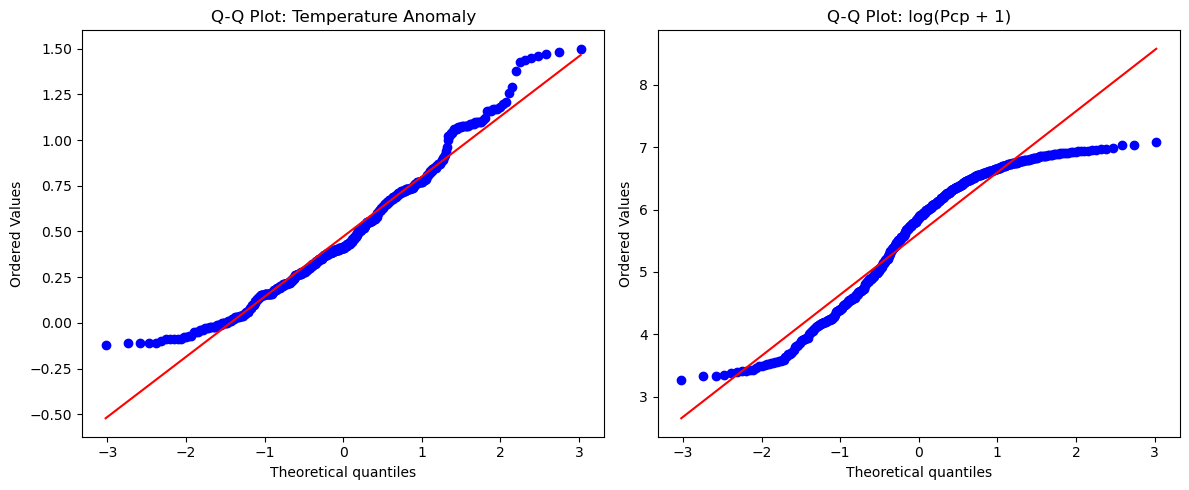

In [10]:
import scipy.stats as stats

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Temp Anomaly
stats.probplot(df['temp_anomaly'], dist="norm", plot=ax1)
ax1.set_title('Q-Q Plot: Temperature Anomaly')

# Pcp (log scale)
stats.probplot(np.log1p(df['precip']), dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot: log(Pcp + 1)')

plt.tight_layout()
plt.show()

## Correlations and Relationships - Insights

- The pearson correlation of 0.02 suggest no strong correlations between temperature anomalies and precipitation in the Caribbean region.
- Since there are seasonality (temperature) and skewness (precipitation) factors, we will use the Spearman Rank Correlation.
The following is a definition of Spearman Correlation from Google AI:
"Spearman's correlation (Spearman's ρ or rho) is a non-parametric statistical measure that assesses the strength and direction of the relationship between two variables, but it works with ranks rather than the actual data values, making it ideal for ordinal data, non-linear monotonic relationships, or data not normally distributed."
- Alternatively, we didn't find any correlations between the temp anomaly and precipitation using the Spearman coefficient.

### Q-Q Plot

Google AI: "Q-Q (Quantile-Quantile) plots are graphical tools used to visually assess if a dataset's distribution matches a theoretical distribution, most commonly the normal distribution, by plotting their quantiles against each other. They help check assumptions for statistical models (like normality of residuals in regression), compare two different samples, or see how data deviates from a specific shape, revealing skewness or outliers better than histograms often can."

The above Q-Q plots confirm near-normal distribution of Temp Anomaly and right skewness of Precipitation.